<a href="https://colab.research.google.com/github/ellenrpaes/Data_Science_Projects/blob/master/Desafio_Data_Science_para_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://github.com/ellenrpaes/Datasets_and_Images/blob/master/RH_v2.png?raw=true" height="180px"></p>

# **CHALLENGE ESCOLA DE DATA SCIENCE: REDUÇÃO DE TURNOVER E RETENÇÃO DE TALENTOS**

Pensar em aplicações de Ciência de Dados não pode ficar limitado aos profissionais que dominam as técnicas matemáticas, metodologias de data mining ou linguagem de programação, por exemplo. Esses perfis são parte de um ecossistema muito maior  que efetivamente só terá sucesso e valor agregado se for pensando junto do Business, na aplicação e solução das reais dores do negócio.

Portanto, podemos pensar em Ciência de Dados em qualquer processo ou empresa porque a aplicação de técnicas de Ciências de Dados estão à nossa disposição para resolver problemas, seja a partir de um insight com uma simples análise exploratória, até aplicações de modelagens preditivas ou técnicas mais robustas como aplicação de redes neurais.

Logo, a área de Recursos Humanos é um mundo de oportunidades analíticas, desde a seleção do candidato "ideal" no Recrutamento & Seleção externo, recomendação de vagas internas para perfis profissionais mais adequados para as oportunidades, análise de turnover para entender possíveis gaps na retenção de talentos e até mesmo uma combinação de KPIs analíticos para gerenciamento dos processos de forma integrada, como o People Analytics.

Nesse projeto, o objetivo será fazer uma análise exploratória dos dados disponibilizados pela IBM no Kaggle que tem como objetivo não somente analisar os dados como buscar soluções para diminuir o Turnover e aumentar a retenção dos talentos, através de um modelo de machine learning.

Independente do ramo de atuação da Empresa, um turnover elevado não é saudável, pois indicam um desperdício financeiro e falhas operacionais que vão desde o processo inicial de escolha do futuro empregado durante o Recrutamento & Seleção, até a sua jornada e experiência na Empresa passando por desenvolvimento, treinamento e performance.



# Data Science para RH

Podemos observar inúmeras aplicações de Data Science na área de Recursos Humanos para ajudar a maximizar resultados e performance, iniciando pelo processo de **Recrutamento e Seleção** do Profissional seja para vagas internas ou externas, fazendo com que o "match ideal" ocorra e os requisitos da vaga sejam atendidos, pelo menos tecnicament já que aspectos comportamentais podem demandar um outro tipo de avaliação. Uma vez dentro da empresa, o time de **Desenvolvimento & Educação** podem atuar em um sistema de recomendação de cursos e plataformas que esteja adequados ao perfil do empregado, reforçando a importância do desenvolvimento contínuo, disponibilizando conteúdos atualizados e que mantenham a jornada de evolução do empregado com a jornada de crescimento da Empresa. Para o time de **Performance**, podemos abordar redução ou manuntenção de nível de *turnover* adequados e que não impactem a continuidade do negócio, problemáticas que impactem a produtividade, engajamento e retenção de talentos, como níveis de atrito entre os profissionais, absenteísmo, entre outros.
Todos os exemplos citados, em conjunto com outros indicadores,estão englobados em uma visão de **KPIs estratégico de Pessoas** que fazem parte do *People Analytics*. Em linhas gerais, como em qualquer processo, não se melhora aquilo que não é medido, desta forma o *People Analytics* visa gerenciar resultados, performance, talentos, otimização de equipes e processos para que a Organização tome decisões orientadas a dados e tenha crescimento perene.



# Escopo deste Projeto
O objetivo deste projeto é analisar e buscar soluções para diminuir o **Turnover**, e aumentar a retenção de bons profissionais nas empresas, utilizando dados criados e disponibilizados por Cientistas De Dados da [IBM]('https://www.ibm.com/br-pt') no [Kaggle]('https://kaggle.com/').
Faremos uma análise exploratória dos dados e  construiremos modelos de Machine Learning para nos ajudar a prever possíveis atritos e contribuir com recomendações, dentro deste escopo, com direcionados a serem avaliados pela  Empresa afim de aumentar a qualidade de vida no ambiente de trabalho, reter os bons profissionais da empresa e minimizar possíveis turnovers em função de atritos.

In [1]:
# hide warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# installing scikit-plot
!pip install -q scikit-plot

In [2]:
# importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#import plotly.express as px

%matplotlib inline

# importando recursos de Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Dicionário de variáveis
Breve explicação das variáveis categóricas:

<p align="center"><img src="https://github.com/ellenrpaes/Datasets_and_Images/blob/master/DicRH.png?raw=true" height="250px"></p>


# Exploração inicial do dataset

Nesta etapa, o objetivo é conhecer a estrutura do conjunto de dados e trabalhar em alguns processamentos nas variáveis para que as análises não sejam comprometidas.

In [3]:
# importando os dados
df = pd.read_csv('https://raw.githubusercontent.com/ellenrpaes/Datasets_and_Images/master/datasets_1067_1925_WA_Fn-UseC_-HR-Employee-Attrition.csv')

# verificando as primeiras entradas
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Através do código abaixo, podemos identificar o tamanho do nosso dataset, a quantidade de colunas existentes, o tipo de dados e a quantidade de dados não nulos. É possível observar que temos nesse dataset um conjunto de 1.470 entradas de dados com 35 variáveis (features) e zero dados faltantes!

In [4]:
# verificando o tamanho do dataset
print("Informações Sobre o Dataset")
print("Variáveis:\t {}".format(df.shape[1]))
print("Entradas:\t {}\n".format(df.shape[0]))

# identificando os tipos das variáveis
display(df.info())

Informações Sobre o Dataset
Variáveis:	 35
Entradas:	 1470

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement    

None

Como temos a variável idade no dataset, seria interessante criarmos 3 novas variáveis chamadas `Age_Range()`, `YearsAtCompany_Range()` e `YearsWithCurrManager_Range()` para agruparmos algumas rápidas visualizações e análises por faixa etária, tempo de empresa e tempo de permanência com os mesmos gestores. Observe que as variáveis foram adicionadas nas últimas colunas desta tabela.

In [5]:
#Faixa Etaria
bins_age = [18, 30, 40, 50, 60] 
labels_age = ['18-30', '31-40', '41-49', '50+']
df["Age_Range"] = pd.cut(df.Age, bins_age, labels = labels_age,include_lowest = True).astype('object')

#Tempo de Empresa
bins_YearsAtCompany = [0, 1, 5, 10, 15, 20, 25, 30, 40] 
labels_YearsAtCompany = ['0-1','2-5', '6-10', '11-15', '16-19','20-25','26-39','30+']
df["YearsAtCompany_Range"] = pd.cut(df.YearsAtCompany, bins_YearsAtCompany, labels = labels_YearsAtCompany,include_lowest = True).astype('object')

#Tempo Mesmo Gerente
bins_YearsWithCurrManager = [0, 1, 5, 10, 15, 20] 
labels_YearsWithCurrManager = ['0-1', '2-5', '6-10', '11-15', '15+']
df["YearsWithCurrManager_Range"] = pd.cut(df.YearsWithCurrManager, bins_YearsWithCurrManager, labels = labels_YearsWithCurrManager,include_lowest = True).astype('object')

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Range,YearsAtCompany_Range,YearsWithCurrManager_Range
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,41-49,6-10,2-5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,41-49,6-10,6-10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,31-40,0-1,0-1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,31-40,6-10,0-1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,18-30,2-5,2-5


Através da análise do código `df.describe(include='O')` é possível termos uma análise inicial interessante dos dados categóricos, como a quantidade de dados existentes, a quantidade de categorização única e quais são os termos mais frequentes destas variáveis. Desta forma, identificamos:

1.   A variável Attrition possui duas categorizações e analisando as 5 primeiras linhas do código anterior, foi possível concluir que trata-se de **Yes** e **No** e que Attrition igual a **No** representam 84% dos dados.
2.  **71%** dos empregados viajam raramente.
3. **65%** dos empregados fazem parte do Departamento de **Research & Development**.
4. **41%** dos empregados possuem formaçao em **Life Sciences**, inicialmente trata-se de uma certa concentração de pessoas com essa formação visto que dentro desta categoria existem 6 tipos possíveis, mas a frente visualizaremos a distribuição do todo.
5. **60%** dos empregados são do gênero **Male**.
6. **22%** dos empregados são **Sales Executive**. Nesta Empresa, existem ainda outros 8 tipos de cargos.
7. **46%** dos empregados são casados.
8. Todos os empregados são maiores de 18 anos.
9. **72%** dos empregados não tem registro de **OverTime**.
10. **42%** dos empregados estão na faixa etária de 31-40 anos.
11. **38%** dos empregados tem de 2 a 5 anos de Empresa
12. **42%** dos empregados tem de 2 a 5 anos de trabalho com o mesmo gestor.


In [6]:
# distribuição estatística das variáveis categóricas
df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Age_Range,YearsAtCompany_Range,YearsWithCurrManager_Range
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2,4,8,5
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No,31-40,2-5,2-5
freq,1233,1043,961,606,882,326,673,1470,1054,619,561,615


# **Análise Exploratória sobre a população desta Empresa**

Podemos fazer uma rápida exploração na tabela abaixo e observar que:

* **42%** dos empregados estão na faixa etária de 31-40 anos e que essa faixa etária ela é representativa independente do gênero, com **42%** para homens e mulheres.

*Caso deseje verificar o código que gerou a tabela, basta clicar na linha abaixo selecionar os 3 pontos ao final e na opção Formulário, escolher a opção Mostrar Código*

In [8]:
#@title Tabela de Frequência da população distribuída por Gênero x Faixa Etária
# Definição de um dataframe segmentado para conhecer a faixa etária dos empregados
df_pyramid = pd.DataFrame(df, columns = ['Gender','Age_Range','EmployeeCount'])
# Realizar um agrupamento da quantidade de empregados por Gênero e Faixa Etária
df_pyramid_1 = df_pyramid.groupby(by=['Gender','Age_Range'])['EmployeeCount'].sum().reset_index()
# Realizar um pivotamento da tabela para transformar a variável gênero em duas variáveis segmentadas pelo gênero
df_pyramid_2 = pd.pivot_table(df_pyramid_1, values='EmployeeCount', index=['Age_Range'] ,columns='Gender', aggfunc= 'sum', fill_value = 0).reset_index()
# Criar uma variável "Total" para saber a quantidade de empregados em cada faixa etária, independente do gênero.
df_pyramid_2["Total"] = df_pyramid_2["Female"] + df_pyramid_2["Male"] 
(print("Quadro Resumo sobre perfil etário e gênero da população Geral da Empresa"))
df_pyramid_2.head()

Quadro Resumo sobre perfil etário e gênero da população Geral da Empresa


Gender,Age_Range,Female,Male,Total
0,18-30,146,240,386
1,31-40,249,370,619
2,41-49,129,193,322
3,50+,64,79,143


Abaixo, de forma gráfica podemos observar abaixo a distribuição dos gêneros entre as faixas etárias.

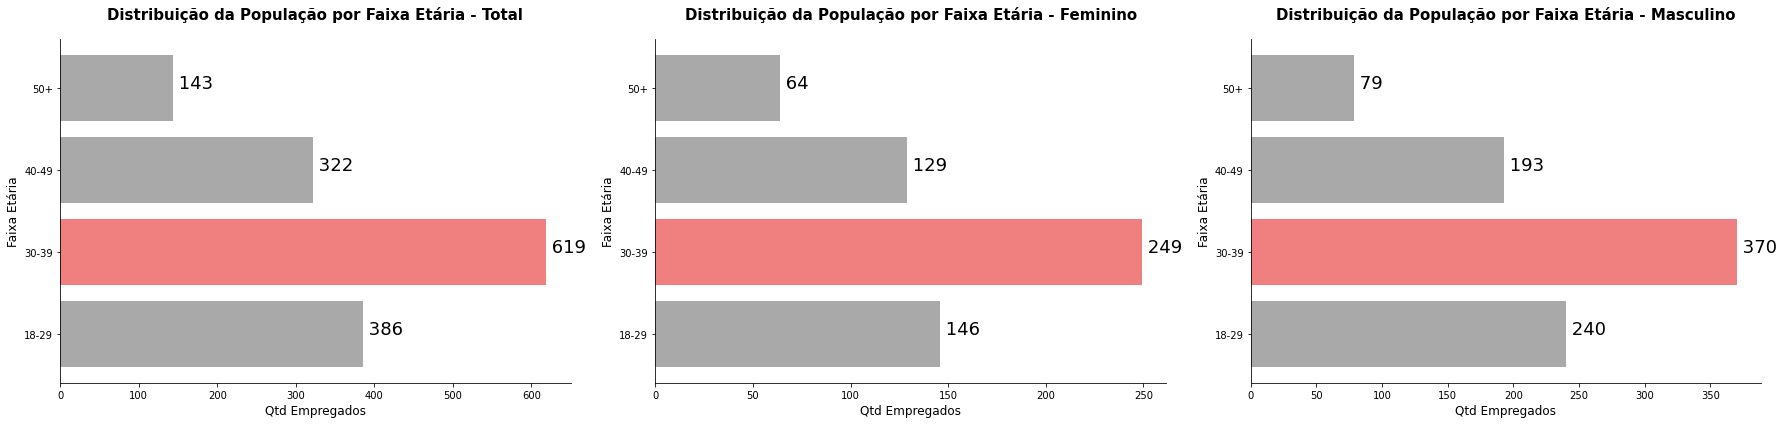

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(25, 6))

x1 = ['18-29','30-39','40-49','50+']
z1 = df_pyramid_2['Total']
ax1.set_title('Distribuição da População por Faixa Etária - Total', fontsize=15, fontweight='bold',pad=20)
ax1.set_xlabel('Qtd Empregados', fontsize=12)
ax1.set_ylabel('Faixa Etária', fontsize=12)
clrs = ['darkgray' if (x < max(z1)) else 'lightcoral' for x in z1 ]
ax1.barh(x1, z1, color=clrs)
for i, v in enumerate(z1):
    ax1.text(v, i, " "+str(v), color='black', fontsize = 18)

x2 = ['18-29','30-39','40-49','50+']
z2 = df_pyramid_2['Female']
ax2.set_title('Distribuição da População por Faixa Etária - Feminino', fontsize=15, fontweight='bold',pad=20)
ax2.set_xlabel('Qtd Empregados', fontsize=12)
ax2.set_ylabel('Faixa Etária', fontsize=12)
clrs = ['darkgray' if (x < max(z2)) else 'lightcoral' for x in z2 ]
ax2.barh(x2, z2, color=clrs)
for i, v in enumerate(z2):
    ax2.text(v, i, " "+str(v), color='black', fontsize = 18)

x3 = ['18-29','30-39','40-49','50+']
z3 = df_pyramid_2['Male']
ax3.set_title('Distribuição da População por Faixa Etária - Masculino', fontsize=15, fontweight='bold',pad=20)
ax3.set_xlabel('Qtd Empregados', fontsize=12)
ax3.set_ylabel('Faixa Etária', fontsize=12)
clrs = ['darkgray' if (x < max(z3)) else 'lightcoral' for x in z3 ]
ax3.barh(x3, z3, color = clrs)
for i, v in enumerate(z3):
    ax3.text(v, i, " "+str(v), color='black', fontsize = 18)

sns.despine(fig)
plt.tight_layout()
plt.show()

Podemos fazer uma rápida exploração na tabela abaixo que contempla a visão de distribuição daqueles que tiveram atritos e observar que:

* **42%** dos empregados estão na faixa etária de 18-30 anos e que ao analisarmos dentro dessa faixa etária temos, com **59%** dos atritos para homens e **41%** mulheres.
* De uma forma geral, independente das faixas, **63%** dos atritos acontecendo com homens e **37%** com mulheres.

*Caso deseje verificar o código que gerou a tabela, basta clicar na linha abaixo selecionar os 3 pontos ao final e na opção Formulário, escolher a opção Mostrar Código*

In [14]:
#@title Tabela de Frequência da população distribuída por Gênero x Faixa Etária | Com Atrito
# Definição de um dataframe segmentado para conhecer o contexto dos empregados que tiveram Attriton
df_yes = df.loc[df.Attrition == "Yes"].copy()
df_yes_ = pd.DataFrame(df_yes, columns = ['Gender','Age_Range','EmployeeCount'])
# Realizar um agrupamento da quantidade de empregados por Gênero e Faixa Etária
df_yes_1 = df_yes_.groupby(by=['Gender','Age_Range'])['EmployeeCount'].sum().reset_index()
# Realizar um pivotamento da tabela para transformar a variável gênero em duas variáveis segmentadas pelo gênero
df_yes_2 = pd.pivot_table(df_yes, values='EmployeeCount', index=['Age_Range'] ,columns='Gender', aggfunc= 'sum', fill_value = 0).reset_index()
# Criar uma variável "Total" para saber a quantidade de empregados em cada faixa etária, independente do gênero.
df_yes_2["Total"] = df_yes_2["Female"] + df_yes_2["Male"] 
df_yes_2.head()

Gender,Age_Range,Female,Male,Total
0,18-30,41,59,100
1,31-40,28,57,85
2,41-49,13,21,34
3,50+,5,13,18


Abaixo, de forma gráfica podemos observar abaixo distribuição dos gêneros entre as faixas etárias.

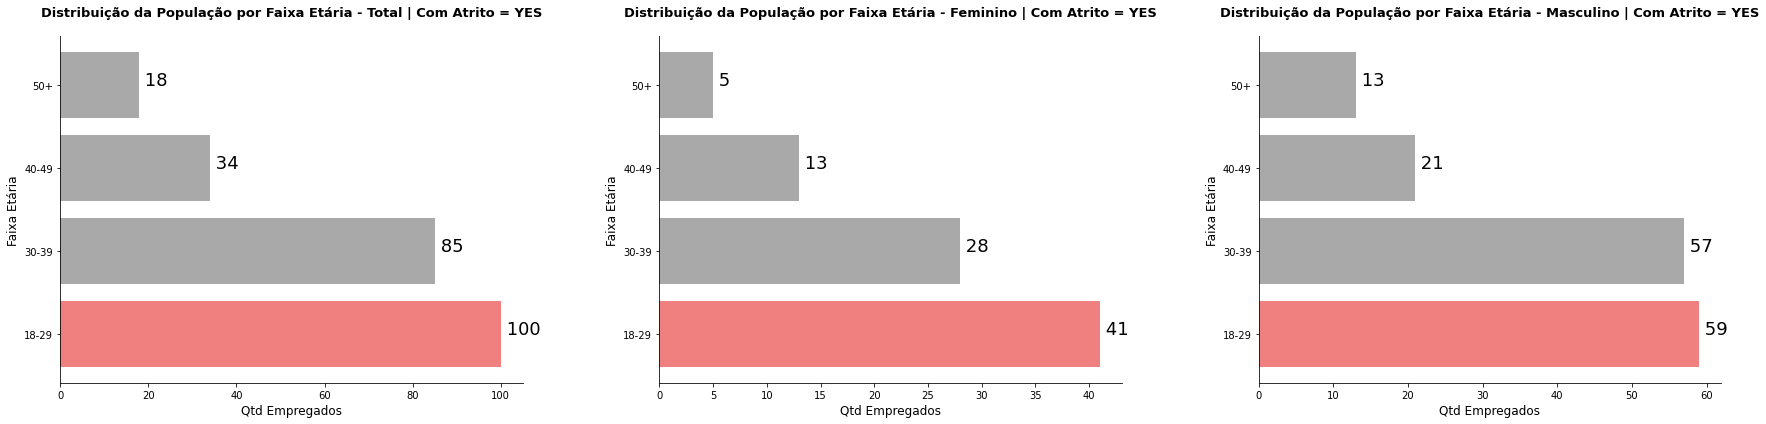

In [16]:
fig, (ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=3, figsize=(25, 6))

x4 = ['18-29','30-39','40-49','50+']
z4 = df_yes_2['Total']
ax4.set_title('Distribuição da População por Faixa Etária - Total | Com Atrito = YES', fontsize=13, fontweight='bold',pad=20)
ax4.set_xlabel('Qtd Empregados', fontsize=12)
ax4.set_ylabel('Faixa Etária', fontsize=12)
clrs = ['darkgray' if (x < max(z4)) else 'lightcoral' for x in z4 ]
ax4.barh(x4, z4, color=clrs)
for i, v in enumerate(z4):
    ax4.text(v, i, " "+str(v), color='black', fontsize = 18)

x5 = ['18-29','30-39','40-49','50+']
z5 = df_yes_2['Female']
ax5.set_title('Distribuição da População por Faixa Etária - Feminino | Com Atrito = YES', fontsize=13, fontweight='bold',pad=20)
ax5.set_xlabel('Qtd Empregados', fontsize=12)
ax5.set_ylabel('Faixa Etária', fontsize=12)
clrs = ['darkgray' if (x < max(z5)) else 'lightcoral' for x in z5 ]
ax5.barh(x5, z5, color=clrs)
for i, v in enumerate(z5):
    ax5.text(v, i, " "+str(v), color='black', fontsize = 18)

x6 = ['18-29','30-39','40-49','50+']
z6 = df_yes_2['Male']
ax6.set_title('Distribuição da População por Faixa Etária - Masculino | Com Atrito = YES', fontsize=13, fontweight='bold',pad=20)
ax6.set_xlabel('Qtd Empregados', fontsize=12)
ax6.set_ylabel('Faixa Etária', fontsize=12)
clrs = ['darkgray' if (x < max(z6)) else 'lightcoral' for x in z6 ]
ax6.barh(x6, z6, color=clrs)
for i, v in enumerate(z6):
    ax6.text(v, i, " "+str(v), color='black', fontsize = 18)

sns.despine(fig)
plt.tight_layout()
plt.show()

Através do gráficos abaixo, seguimos na nossa exploração de informações e acrescentamos que:

*  43% até 30 anos
*  56% no Departamento Research & Development
*  26% no cargo de Laboratory Technician

Mas será que podemos olhar os gráficos abaixo e já tirar essas conclusões sem antes avaliar também a proporção desta população no total? 

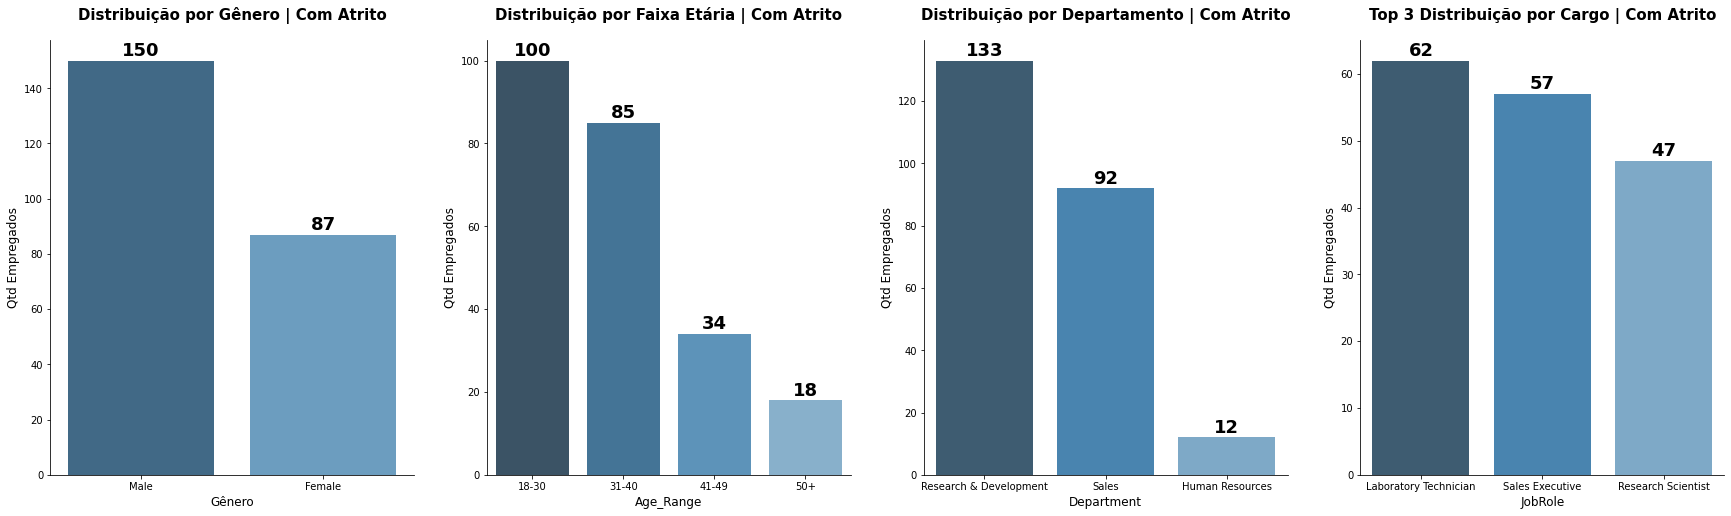

In [19]:
# plotar gráfico de gêneros
f, axes = plt.subplots(1, 4,figsize=(30, 8))

ax1 = sns.countplot(x="Gender", palette="Blues_d", data=df_yes[df_yes['EmployeeCount'] == 1], order=df_yes['Gender'].value_counts().index,ax=axes[0])
ax1.set_title('Distribuição por Gênero | Com Atrito', fontsize=15, fontweight='bold',pad=20)
ax1.set_xlabel('Gênero', fontsize=12)
ax1.set_ylabel('Qtd Empregados', fontsize=12)
for p in ax1.patches:
  ax1.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', textcoords = 'offset points', xytext = (0, 10), fontsize=18,fontweight='bold')

ax2 = sns.countplot(x="Age_Range", palette="Blues_d",data=df_yes[df_yes['EmployeeCount'] == 1], order=df_yes['Age_Range'].value_counts().index,ax=axes[1])
ax2.set_title('Distribuição por Faixa Etária | Com Atrito', fontsize=15, fontweight='bold',pad=20)
ax2.set_xlabel('Age_Range', fontsize=12)
ax2.set_ylabel('Qtd Empregados', fontsize=12)
for p in ax2.patches:
  ax2.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=18, fontweight='bold')

ax3 = sns.countplot(x="Department", palette="Blues_d",data=df_yes[df_yes['EmployeeCount'] == 1], order=df_yes['Department'].value_counts().index,ax=axes[2])
ax3.set_title('Distribuição por Departamento | Com Atrito', fontsize=15, fontweight='bold', pad=20)
ax3.set_xlabel('Department', fontsize=12)
ax3.set_ylabel('Qtd Empregados', fontsize=12)
for p in ax3.patches:
  ax3.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=18, fontweight='bold')

ax4 = sns.countplot(x="JobRole", palette="Blues_d",data=df_yes[df_yes['EmployeeCount'] == 1], order=df_yes['JobRole'].value_counts()[0:3].index,ax=axes[3])
ax4.set_title('Top 3 Distribuição por Cargo | Com Atrito', fontsize=15, fontweight='bold',pad=20)
ax4.set_xlabel('JobRole', fontsize=12)
ax4.set_ylabel('Qtd Empregados', fontsize=12)
for p in ax4.patches:
  ax4.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=18, fontweight='bold')

sns.despine(f)
plt.show()

Analisando os resultados das variáveis acima da perspectiva de proporção dos dados, temos:

*   Do total de homens, 17% apresentam atrito. Já do total de mulheres, são 14,7%.
*  25,9% dos empregados na faixa etária 18-30 anos apresentam atritos
*  Quanto aos Departamentos, temos uma outra visão extreamente interessante, pois proporcionalmente ao número de empregados existentes, o 'problema' não está concentrado no Departamento Research & Development com apenas 13,8% dos empregados com atritos e sim em Sales, com 20,6% dos empregados apresentando atritos, seguido fortemente por Human Resources com 19%.
* Com a inversão de 'ordens' dos Departamentos, tivemos também alteração nas ordens dos cargos, podemos afirmar que proporcionalmente, os cargos Top 3 que apresentam mais atritos são Sales Representative (39,7%), Laboratory Technician (23,9%) e Human Resources (23%).




In [20]:
print("Proporção por Gender:\n", (df_yes.groupby(by=['Gender'])['EmployeeCount'].sum() / df.groupby(by=['Gender'])['EmployeeCount'].sum()))
print("Proporção por Age Range:\n",(df_yes_2.groupby(by=['Age_Range'])['Total'].sum() / df_pyramid_2.groupby(by=['Age_Range'])['Total'].sum()))
print("Proporção por Department:\n", (df_yes.groupby(by=['Department'])['EmployeeCount'].sum() / df.groupby(by=['Department'])['EmployeeCount'].sum()))
print("Proporção por JobRole:\n",(df_yes.groupby(by=['JobRole'])['EmployeeCount'].sum() / df.groupby(by=['JobRole'])['EmployeeCount'].sum()))

Proporção por Gender:
 Gender
Female    0.147959
Male      0.170068
Name: EmployeeCount, dtype: float64
Proporção por Age Range:
 Age_Range
18-30    0.259067
31-40    0.137318
41-49    0.105590
50+      0.125874
Name: Total, dtype: float64
Proporção por Department:
 Department
Human Resources           0.190476
Research & Development    0.138398
Sales                     0.206278
Name: EmployeeCount, dtype: float64
Proporção por JobRole:
 JobRole
Healthcare Representative    0.068702
Human Resources              0.230769
Laboratory Technician        0.239382
Manager                      0.049020
Manufacturing Director       0.068966
Research Director            0.025000
Research Scientist           0.160959
Sales Executive              0.174847
Sales Representative         0.397590
Name: EmployeeCount, dtype: float64


Continuando nossa jornada exploratória, podemos observar também que os atritos ocorrem com empregadados com até 5 anos de empresa, sendo 31,6% em até 12 meses somente, ainda com pouco tempo com o mesmo gestor.

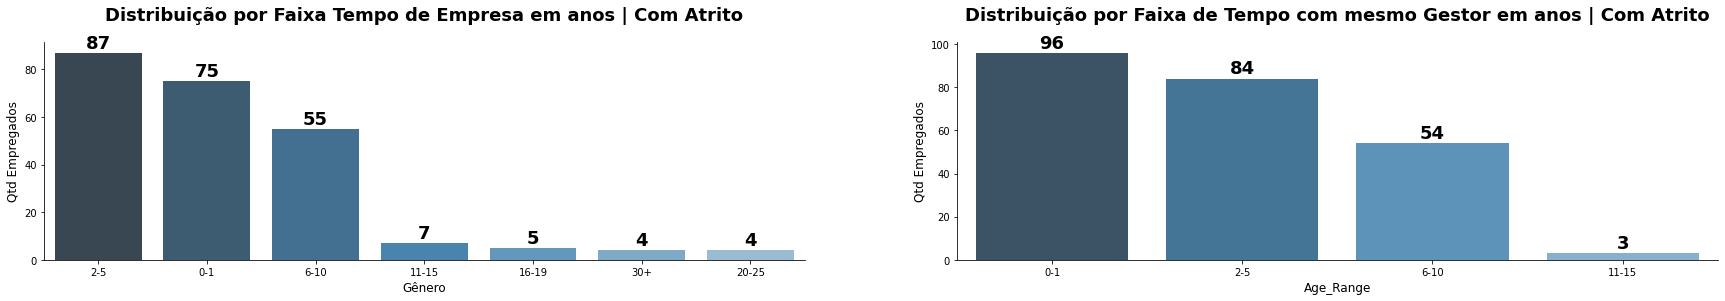

In [22]:
f, axes = plt.subplots(1, 2,figsize=(30, 4))

ax1 = sns.countplot(x="YearsAtCompany_Range", palette="Blues_d", data=df_yes[df_yes['EmployeeCount'] == 1], order=df_yes['YearsAtCompany_Range'].value_counts().index,ax=axes[0])
ax1.set_title('Distribuição por Faixa Tempo de Empresa em anos | Com Atrito', fontsize=18, fontweight='bold',pad=22)
ax1.set_xlabel('Gênero', fontsize=12)
ax1.set_ylabel('Qtd Empregados', fontsize=12)
for p in ax1.patches:
  ax1.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', textcoords = 'offset points', xytext = (0, 10), fontsize=18,fontweight='bold')

ax2 = sns.countplot(x="YearsWithCurrManager_Range", palette="Blues_d",data=df_yes[df_yes['EmployeeCount'] == 1], order=df_yes['YearsWithCurrManager_Range'].value_counts().index,ax=axes[1])
ax2.set_title('Distribuição por Faixa de Tempo com mesmo Gestor em anos | Com Atrito', fontsize=18, fontweight='bold',pad=22)
ax2.set_xlabel('Age_Range', fontsize=12)
ax2.set_ylabel('Qtd Empregados', fontsize=12)
for p in ax2.patches:
  ax2.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=18, fontweight='bold')


sns.despine(f)
plt.show()

Abaixo, podemos aplicar uma análise dos dados utilizando uma exploração da distribuição das variáveis para as duas possibilidades do nosso problema de classificação. Trata-se de uma boa visualização pois a classe que tem mais amplitude é onde a densidade probabilística é maior. 

Dando continuidade ao nosso diagnóstico sobre o panorama nessa empresa e analisando os gráficos abaixo da perspectica dos atritos, acrescentamos:

* População até 30 anos
* Nível educacional bacharelado
* Insatisfeitas com o ambiente mas curiosamente envolvidas com o seu de trabalho 
* Menores valores de salário
* Pouca ou nenhuma experiência de empresas anteriores
* Com histórico de promoção recente 
* Ótimo resultado entre equilíbrio de vida e trabalho. 

O que buscamos aqui são diferenças nas distribuições para podermos encontrar pontos chave para previsão de atrito entre os funcionários. No geral, as distribuições são bastante parecidas, não havendo grande discrepância.

> A representação laranja é para funcionários que apresentam atritos e a representação azul para funcionários que não apresentam atrito.


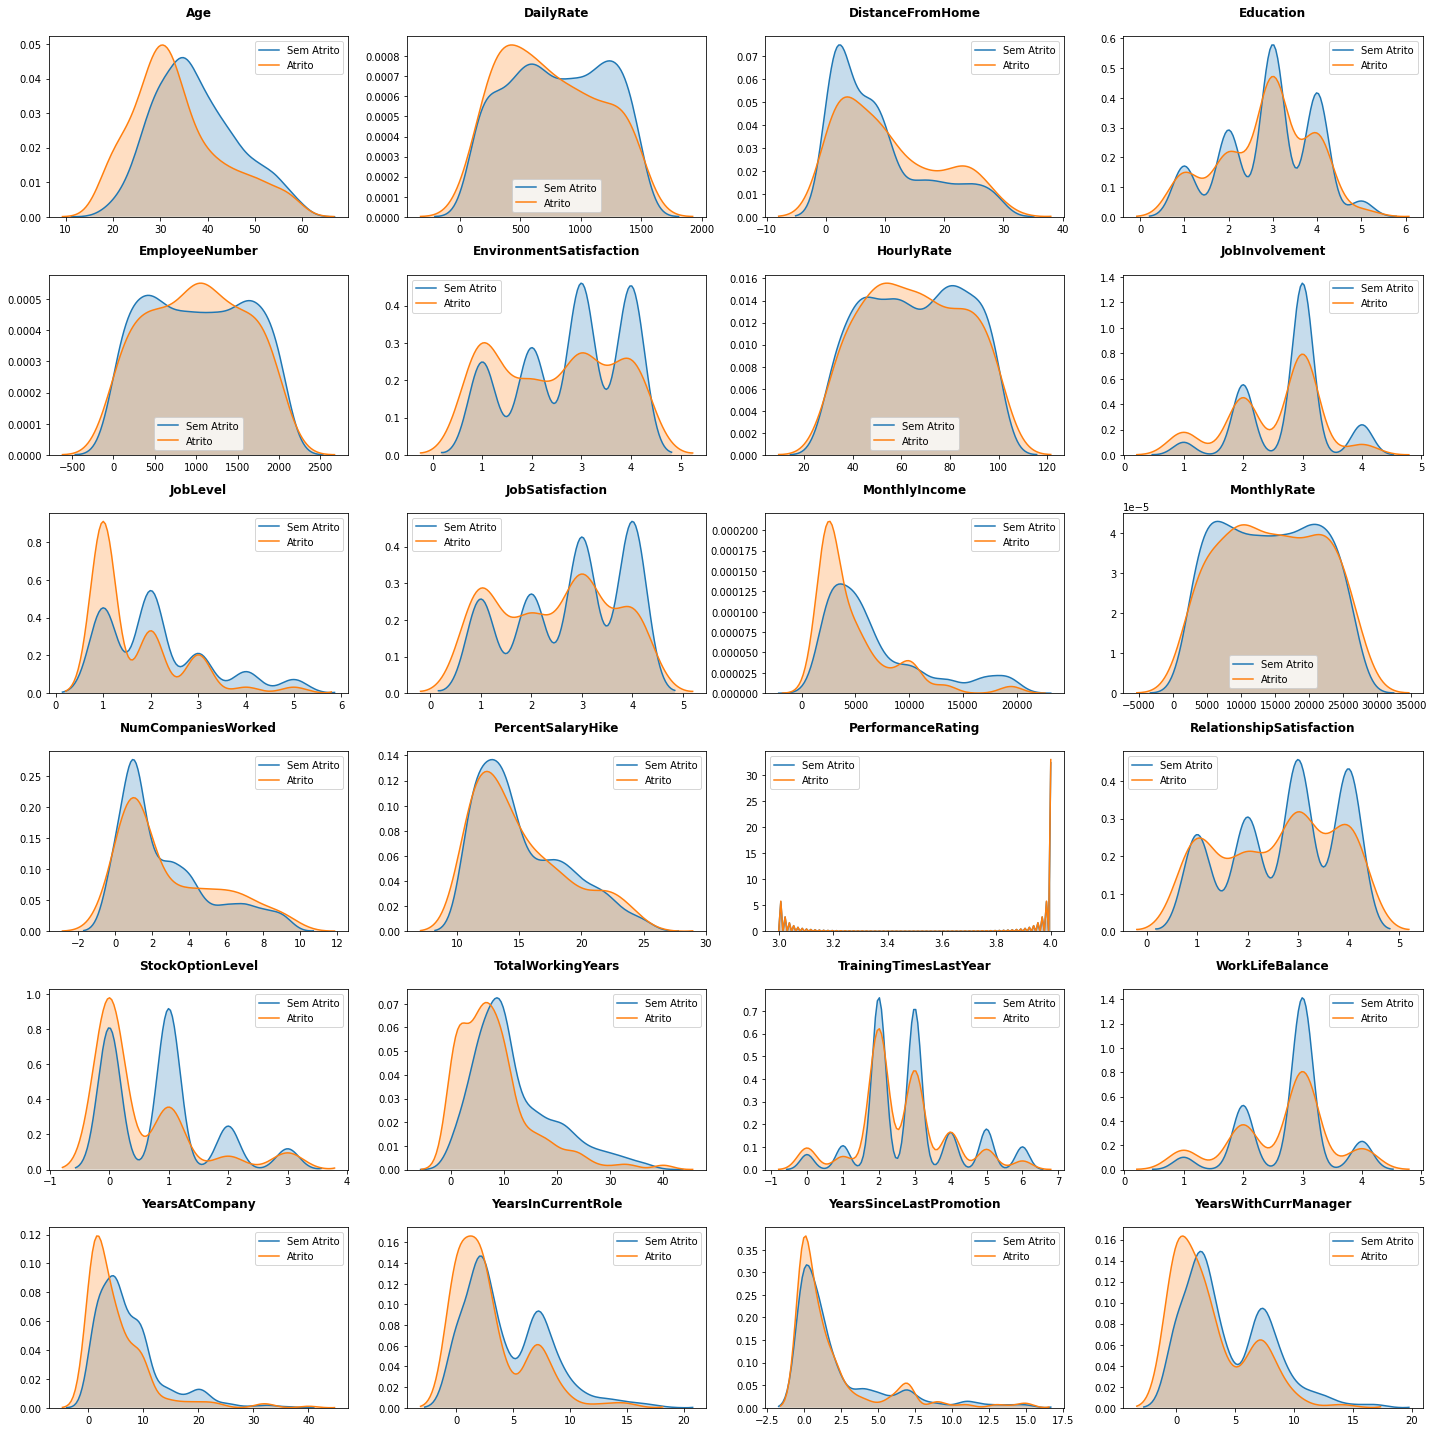

In [23]:
# transformando a variável alvo
df = pd.read_csv('https://raw.githubusercontent.com/ellenrpaes/Datasets_and_Images/master/datasets_1067_1925_WA_Fn-UseC_-HR-Employee-Attrition.csv')
target_map = {'Yes':1, 'No':0}
# criando a coluna alvo
df["Attrition_numerical"] = df["Attrition"].apply(lambda x: target_map[x])

# plotando gráfico de densidade
colunas = df.drop(['Attrition', 'BusinessTravel', 'Department',
                       'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
                       'Over18', 'OverTime','EmployeeCount', 'StandardHours', 'Attrition_numerical'], axis=1).columns
num_plots = len(colunas)
df_class_0 = df[df.Attrition_numerical == 0]
df_class_1 = df[df.Attrition_numerical == 1]

fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(20,20))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in colunas:
    idx += 1
    plt.subplot(6, 4, idx)
    sns.kdeplot(df_class_0[col], label="Sem Atrito", shade=True)
    sns.kdeplot(df_class_1[col], label="Atrito", shade=True)
    plt.title(col, fontsize=12,fontweight='bold',pad=20)
plt.tight_layout()
plt.savefig('density.png')

# Balanceamento da Classe

A variável `Attrition()`, indica se o funcionário possui atrito no ambiente de trabalho. Usaremos ela como variável alvo do nosso modelo de Machine Learning, pois seria a categoria mais marcante de motivo para que o profissional saia da empresa, e por isso focamos nela.

Conforme abaixo, apenas 237 (16%) dos dados estão classificados com atrito, o que nos indica que há um desbalanceamento dessa classe e a necessidade de realizamos uma técnica de balanceamento para posterior fit.

0    1233
1     237
Name: Attrition_numerical, dtype: int64

Atritos Representam 16.12% Do Dataset.



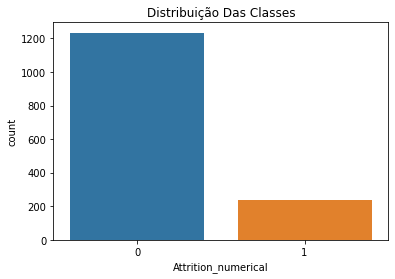

In [24]:
# checando a distribuição da variável alvo
print(df.Attrition_numerical.value_counts())
print("\nAtritos Representam {:.2f}% Do Dataset.\n".format((df[df.Attrition_numerical == 1].shape[0] / df.shape[0]) * 100))

# plotando gráfico de barras
fig, ax = plt.subplots()
sns.countplot('Attrition_numerical', data=df, ax=ax)
ax.set_title('Distribuição Das Classes')
plt.show()

## Preparando os Dados para Machine Learning

Para inserir nossos dados em um modelo de Machine Learning precisamos trabalhá-los. Ao fazer o pré-processamento dos dados, vamos passar por duas etapas:

* Transformação de variáveis categóricas: Utilizaremos o **Label Encoder**, que transforma Strings em números representando categorias.

* Transformação de variáveis numéricas: Uitlizaremos **MinMaxScaler**. De forma simples, ele coloca os números das entradas em uma escala de 0 a 1. Esse processo também nos ajuda com Outliers, por isso não havíamos tratado eles anteriormente.

In [25]:
# checando o dataset no
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


In [26]:
# criando cópia do dataset
df_minmax = df.copy()
# retirando colunas desnecessárias
df_minmax.drop(['Attrition', 'Over18','EmployeeNumber','EmployeeCount','StandardHours'], axis=1, inplace=True)
df_minmax.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0


#### Transformação de variáveis categóricas

In [27]:
# instanciando o encoder
le = LabelEncoder()

# encoding de variáveis numéricas
df_minmax['BusinessTravel'] = le.fit_transform(df_minmax['BusinessTravel'])
df_minmax['Department'] = le.fit_transform(df_minmax['Department'])
df_minmax['EducationField'] = le.fit_transform(df_minmax['EducationField'])
df_minmax['Gender'] = le.fit_transform(df_minmax['Gender'])
df_minmax['JobRole'] = le.fit_transform(df_minmax['JobRole'])
df_minmax['MaritalStatus'] = le.fit_transform(df_minmax['MaritalStatus'])
df_minmax['OverTime'] = le.fit_transform(df_minmax['OverTime'])

# checando o resultado
df_minmax.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0


#### Transformação de variáveis Numéricas

In [28]:
# MinMaxScaler
scaler = MinMaxScaler()
df_minmax[['Age']] = scaler.fit_transform(df_minmax[['Age']])
df_minmax[['DailyRate']] = scaler.fit_transform(df_minmax[['DailyRate']])
df_minmax[['HourlyRate']] = scaler.fit_transform(df_minmax[['HourlyRate']])
df_minmax[['MonthlyIncome']] = scaler.fit_transform(df_minmax[['MonthlyIncome']])
df_minmax[['MonthlyRate']] = scaler.fit_transform(df_minmax[['MonthlyRate']])
df_minmax[['NumCompaniesWorked']] = scaler.fit_transform(df_minmax[['NumCompaniesWorked']])
df_minmax[['PercentSalaryHike']] = scaler.fit_transform(df_minmax[['PercentSalaryHike']])
df_minmax[['TotalWorkingYears']] = scaler.fit_transform(df_minmax[['TotalWorkingYears']])
df_minmax[['TrainingTimesLastYear']] = scaler.fit_transform(df_minmax[['TrainingTimesLastYear']])
df_minmax[['YearsAtCompany']] = scaler.fit_transform(df_minmax[['YearsAtCompany']])
df_minmax[['YearsInCurrentRole']] = scaler.fit_transform(df_minmax[['YearsInCurrentRole']])
df_minmax[['YearsSinceLastPromotion']] = scaler.fit_transform(df_minmax[['YearsSinceLastPromotion']])
df_minmax[['YearsWithCurrManager']] = scaler.fit_transform(df_minmax[['YearsWithCurrManager']])

# checando o resultado
df_minmax.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,0.547619,2,0.715820,2,1,2,1,2,0,0.914286,3,2,7,4,2,0.262454,0.698053,0.888889,1,0.000000,3,1,0,0.200,0.0,1,0.15,0.222222,0.000000,0.294118,1
1,0.738095,1,0.126700,1,8,1,1,3,1,0.442857,2,2,6,2,1,0.217009,0.916001,0.111111,0,0.857143,4,4,1,0.250,0.5,3,0.25,0.388889,0.066667,0.411765,0
2,0.452381,2,0.909807,1,2,2,4,4,1,0.885714,2,1,2,3,2,0.056925,0.012126,0.666667,1,0.285714,3,2,0,0.175,0.5,3,0.00,0.000000,0.000000,0.000000,1
3,0.357143,1,0.923407,1,3,4,1,4,0,0.371429,3,1,6,3,1,0.100053,0.845814,0.111111,1,0.000000,3,3,0,0.200,0.5,3,0.20,0.388889,0.200000,0.000000,0
4,0.214286,2,0.350036,1,2,1,3,1,1,0.142857,3,1,2,2,1,0.129489,0.583738,1.000000,0,0.071429,3,4,1,0.150,0.5,3,0.05,0.111111,0.133333,0.117647,0


### Separando o dataset em Treino e Teste
Para que possamos fazer previsões, precisamos separar o nosso conjunto de dados entre treino e teste.

In [29]:
# separando o dataset
X = df_minmax.drop(['Attrition_numerical'], axis=1)
y = df['Attrition_numerical']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

### Balanceando os dados

Anteriormente havíamos visto que a maioria dos funcionários não tinha atrito. Isso significa que nosso conjunto de dados está desbalanceado, e precisa ser tratado para melhorar a performance do nosso modelo.

Para isso, utilizaremos o `RandomUnderSampler`, para preservar a classe minoritária (Atrito).

1    178
0    178
dtype: int64


Text(0.5, 1.0, 'Distribuição Das Classes')

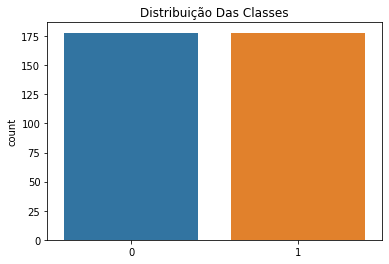

In [30]:
# aplicando o UnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# checando o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotando a nova distribuição das classes
sns_plot = sns.countplot(y_rus);
plt.title("Distribuição Das Classes")
#plt.savefig("balanced.png")

## Machine Learning

Após entendermos melhor nossos dados, e a realidade da empresa, e prepararmos nossos dados, é hora de utilizarmos Machine Learning para fazer previsões que podem nos ajudar na prevenção de atritos/conflitos na empresa, e, consequentemente, diminuirmos o Turnover.

Para isso, utilizaremos dois modelos diferentes de Machine Learning:

>* Regressão Logística
* Random Forest
* SVM - Support Vector Machine

Para que possamos entender melhor as métricas de avaliação de um modelo de Machine Learning, segue [aqui](https://medium.com/data-hackers/como-avaliar-seu-modelo-de-classifica%C3%A7%C3%A3o-34e6f6011108) um artigo do Cientista de Dados e aluno do Sigmoidal, Marcelo Randolfo, publicado no Data Hackers, onde ele explica em detalhe como avaliar um modelo de classificação, como esse.

### Baseline Com Dados Não Balanceados

Como estamos trabalhando em um projeto que existe no vácuo, isto é, sem contexto prévio de métricas já utilizadas pela empresa, precisamos criar uma baseline, um resultado mínimo aceitável, que sirva de referência para nosso aprimoramento.

Neste caso, utilizaremos o modelo de Regressão Logística, com nossos dados desbalanceados. Isso é importante para que possamos aferir se há mesmo a necessidade de balancear nossos dados.

In [31]:
# criando uma cópia dos dados desbalanceados
df_desbalanceado = df_minmax.copy()

# separando as variáveis entre X e y
desb_X = df_desbalanceado.drop(['Attrition_numerical',"Age",'Department','JobLevel','JobRole','MaritalStatus','MonthlyIncome',
                   'PercentSalaryHike', 'PerformanceRating','StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
                   'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], axis=1)
desb_y = df_desbalanceado['Attrition_numerical']

# dividindo o conjunto de dados
desb_X_train, desb_X_test, desb_y_train, desb_y_test = train_test_split(desb_X, desb_y, stratify=y, shuffle=True)

In [32]:
# instanciando e treinando um modelo de Regressão Logística
np.random.seed(2)
desb_model = LogisticRegression()
desb_model.fit(desb_X_train, desb_y_train)

# instanciando e treinando um modelo de Regressão Logística
results = cross_val_score(desb_model, desb_X_train, 
                          desb_y_train, cv = 5, scoring = 'accuracy')
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia médio: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
intervalo(results)

Acurácia médio: 84.57%
Intervalo de acurácia: [82.36% ~ 86.79%]


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.8571    0.9903    0.9189       309
           1     0.7273    0.1356    0.2286        59

    accuracy                         0.8533       368
   macro avg     0.7922    0.5629    0.5737       368
weighted avg     0.8363    0.8533    0.8082       368

Acurácia: 0.8533



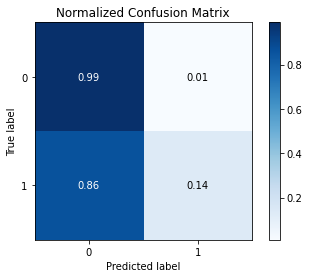

In [33]:
# fazendo previsões
desb_y_pred = desb_model.predict(desb_X_test)
desb_y_proba = desb_model.predict_proba(desb_X_test)

# plotando a matrix de confusão
skplt.metrics.plot_confusion_matrix(desb_y_test, desb_y_pred, normalize=True)

# imprimindo o Relatório de Classificação
print("Relatório de Classificação:\n", classification_report(desb_y_test, desb_y_pred, digits=4))

# Imprimindo a Acurácia
print("Acurácia: {:.4f}\n".format(accuracy_score(desb_y_test, desb_y_pred)))


### Conclusões
Ao analisarmos a Matriz de Confusão, conseguimos ver que tivemos muitos Falsos Negativos, o que é um problema.

* Apesar do modelo apresentar uma Acurácia de cerca de 87% não podemos levar apenas essa métrica em consideração.
* Temos um número elevado de Falsos Negativos, o que é um problema.

### Dados Balanceados

Agora que temos nossa baseline, e um objetivo a bater, é hora de trabalharmos com nossos dados cuidadosamente trabalhados e buscarmos o nosso melhor.

In [34]:
# instanciando e treinando um modelo de Regressão Logística
np.random.seed(2)
model = LogisticRegression()
results = cross_val_score(model, X_rus, 
                          y_rus, cv = 10, scoring = 'accuracy')
intervalo(results)

model.fit(X_rus, y_rus)


Acurácia médio: 71.06%
Intervalo de acurácia: [56.73% ~ 85.38%]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9556    0.7670    0.8510       309
           1     0.4000    0.8136    0.5363        59

    accuracy                         0.7745       368
   macro avg     0.6778    0.7903    0.6937       368
weighted avg     0.8666    0.7745    0.8005       368

Acurácia: 0.7745



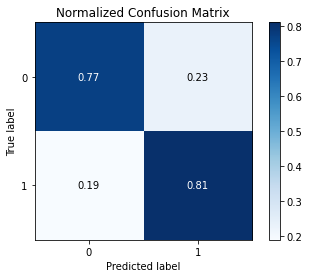

In [35]:
# fazendo previsões
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Matriz de Confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# Relatório de Classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# Acurácia
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))


### Conclusões - Regressão Logística

Aqui podemos ver que com dados balanceados, nossos resultados foram melhores.

* Apesar de termos diminuído a quantidade de Falsos Negativos, aumentamos a de Falsos Positivos. Isso é bom, pois é melhor cuidarmos de um funcionário que talvez não esteja em atrito, do que deixar passar um que vá ter atrito. 
* Temos 0.8 Verdadeiros Positivos
* Outra métrica interessante é o resultado do Recall de 0.7966 para a classe 1 pois mostra a frequencia daqueles que foram classificados como pertencentes a uma classe e que realmente são daquela classe.

### Random Forest

Vamos testar se conseguiríamos um resultado superior utilizando outro algoritmo de Machine Learning. Neste caso, utilizaremos o **Random Forest**, que em tradução livre, significa "Floresta Aleatória".Como o nome sugere, ele é baseado em modelos de árvore de decisão. A diferença é que ele cria **muitas árvores de decisão de maneira aleatória**. 

In [36]:
# criando e treinando o modelo
seed = 0
rf = RandomForestClassifier(n_jobs = -1,
                            n_estimators= 1000,
                            max_features= 0.3,
                            max_depth= 3,
                            min_samples_leaf= 3,
                            random_state= seed, verbose= 0, oob_score = 5)

# cross validation Random Forest Classifier
results = cross_val_score(rf, X_rus, 
                          y_rus, cv = 5, scoring = 'accuracy')
intervalo(results)

Acurácia médio: 68.83%
Intervalo de acurácia: [54.68% ~ 82.98%]


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9149    0.8350    0.8731       309
           1     0.4070    0.5932    0.4828        59

    accuracy                         0.7962       368
   macro avg     0.6609    0.7141    0.6779       368
weighted avg     0.8335    0.7962    0.8105       368

Acurácia:	 0.7962



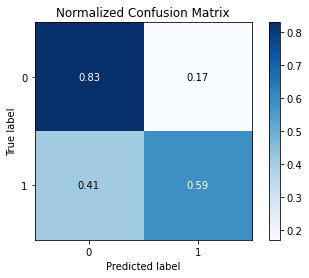

In [37]:
# fazendo previsões
rf.fit(X_rus, y_rus)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

# Relatório de Classificação
print('Relatório de Classificação:\n', classification_report(y_test, y_pred, digits=4))

# Acurácia
print('Acurácia:\t {:.4f}\n'.format(accuracy_score(y_test, y_pred)))


# confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True);

### Conclusões - Random Forest

Seguindo com os dados balanceados, observa-se:

* Uma queda na performance, quando comparado com o modelo de Regressão Logística, com 0.69 Verdadeiros Positivos
* O Recall também apresentou queda, com 0.6949 para a classe 1 (Verdadeiro Positivo).

### Variáveis Mais Importantes
Outra verificação interessante que podemos fazer é em relação às features (variáveis) mais importantes para o resultado do modelo.

In [38]:
# calculando importância das features para Random Forest
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={"index": "features"}, inplace=True)

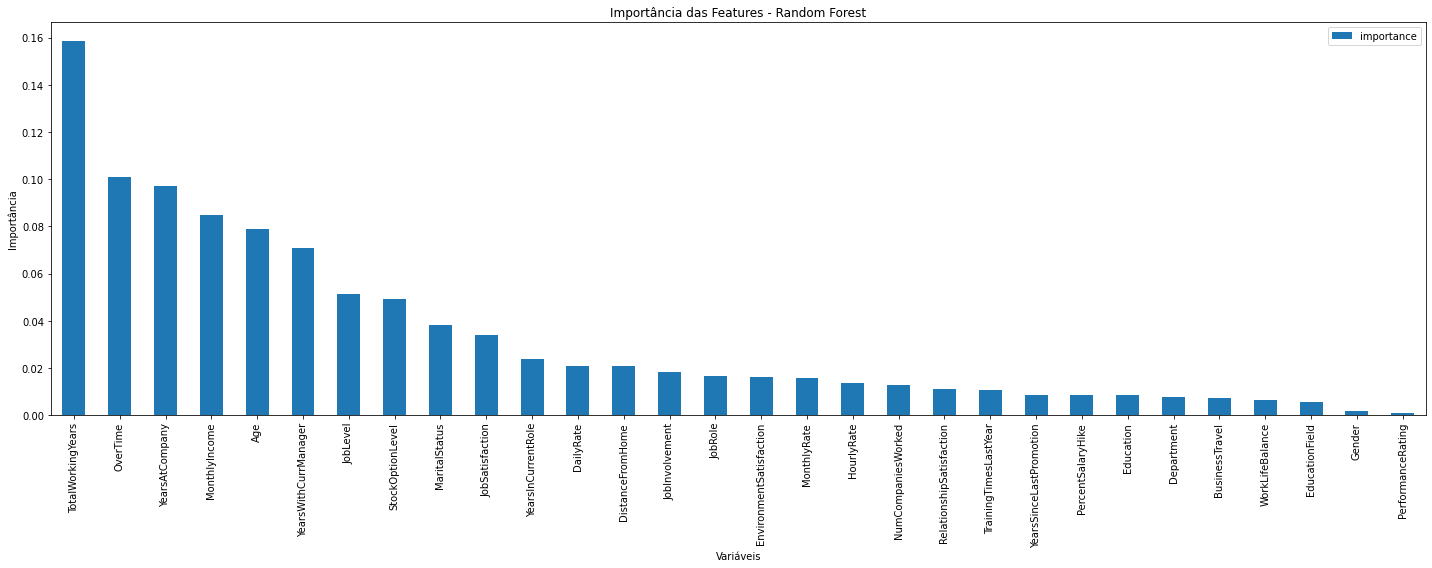

In [39]:
# plotar o gráfico de barras para variáveis mais importantes
fig, ax = plt.subplots(figsize=(20,8))

feature_importances.plot(x="features", y="importance", kind="bar", ax=ax)

ax.set_title("Importância das Features - Random Forest")
ax.set_xlabel("Variáveis")
ax.set_ylabel("Importância")

plt.savefig("feat_imp.png")
plt.tight_layout()

### Conclusões - Random Forest

Entre as principais variáveis, podemos destacar:
* Salário Mensal (MonthlyIncome)
* Horas Extras (OverTime)
* Nível do Cargo (JobLevel)
* Anos Trabalhando (TotalWorkingYears)
* Idade (Age)
* Anos com o Gerente Atual (YearsWithCurrentManager)


### SVM

In [40]:
from sklearn.svm import SVC

In [41]:
model = SVC()
results = cross_val_score(model, X_rus, 
                          y_rus, cv = 10, scoring = 'accuracy')
intervalo(results)
model.fit(X_rus, y_rus)

Acurácia médio: 66.29%
Intervalo de acurácia: [52.10% ~ 80.47%]


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9144    0.6570    0.7646       309
           1     0.2740    0.6780    0.3902        59

    accuracy                         0.6603       368
   macro avg     0.5942    0.6675    0.5774       368
weighted avg     0.8117    0.6603    0.7046       368

Acurácia: 0.6603



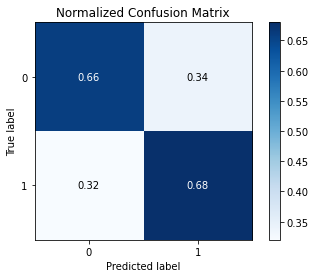

In [42]:
# fazendo previsões
y_pred = model.predict(X_test)

# Matriz de Confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# Relatório de Classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# Acurácia
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

### Conclusões - SVM

Seguindo com os dados balanceados, observa-se:

* Performance bastante similar ao modelo de Regressão Logística

# Conclusões

O modelo de Regressão Logística apresentou melhor performance após ajustes no hiperparâmetro de aumentar a quantidade de cross validation de 5 para 10. E a métrica escolhida para ser o balizador para escolha do foi o Recall pois optamos por ter uma performance voltada para identificar dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas.

Entretanto, as variáveis mais importantes apresentadas pelo Random Forest são muito valiosas, pois podem nos dar insights dos pontos mais críticos para geração de atritos, e com essa informação, podemos agir preventivamente.

Entre as principais variáveis, podemos destacar:
* Salário Mensal (MonthlyIncome)
* Horas Extras (OverTime)
* Nível do Cargo (JobLevel)
* Anos Trabalhando (TotalWorkingYears)
* Idade (Age)
* Anos com o Gerente Atual (YearsWithCurrentManager)

Podemos identificar variáveis bastante relacionadas com a carreira, benefícios e carga horária. Altos níveis de stress? Sentimento de desvalorização? São hipóteses. Somente uma análise mais detalhada pode nos dizer. No entanto vale destacar o quão valiosa a análise exploratória feita está alinhada com as features importances apresentadas pelo modelo.

Com acesso a mais dados, melhor entendimento do contexto organizacional da empresa e suas políticas este trabalho pode ser melhor direcionado para resolver a real dor deste negócio.

# Possíveis Melhorias / Oportunidades

* Pré-processamento dos dados
* Feature Engineering
* Testar Diferentes Modelos de Classificação
* Avançar com o Tuning de Parâmetros